Observação: Para executar o codigo a seguir primeiramente tenha em mão o arquivo "iris.csv" do campus virtual
Depois, basta executar esse primeiro trecho abaixo e fazer o upload dele na aba "procurar", e por fim execute o resto.

In [ ]:
from google.colab import files

# Carregue o arquivo CSV para o Colab
uploaded = files.upload()

Saving iris.csv to iris (2).csv


In [ ]:
import pandas as pd

# Lê o arquivo CSV
data = pd.read_csv('iris (1).csv')

# Exibe os primeiros registros para verificar se os dados foram lidos corretamente
print(data.head())


   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


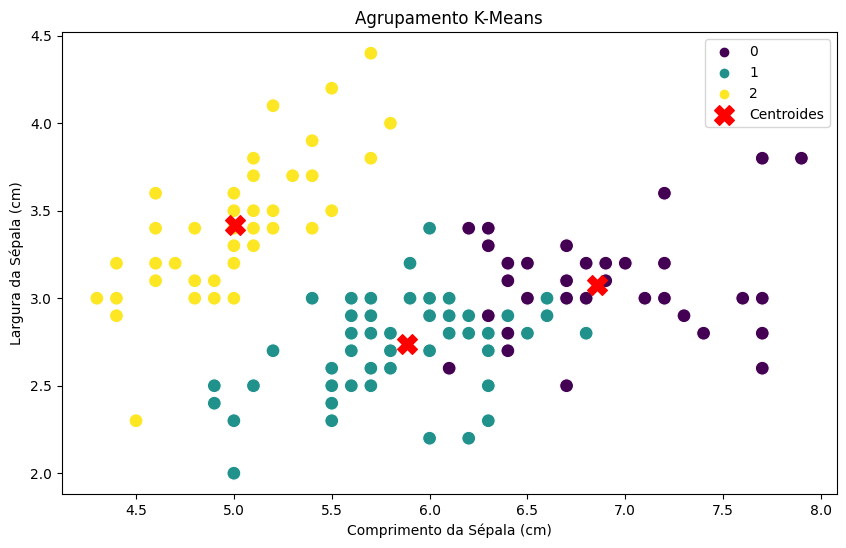

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Lê os dados do conjunto de dados Iris
dados = pd.read_csv('iris (1).csv')

# Remove a coluna 'Id' que não é relevante
dados = dados.drop('Id', axis=1)

# Separa os dados de treinamento (características)
X = dados.iloc[:, :-1].values

# Inicializa o número de clusters (neste caso, 3)
k = 3

# Inicializa os centroides aleatoriamente
np.random.seed(0)
centroid = X[np.random.choice(X.shape[0], k, replace=False)]

# Função para calcular a distância euclidiana entre dois pontos
def distancia_euclidiana(ponto1, ponto2):
    return np.sqrt(np.sum((ponto1 - ponto2) ** 2))

# Função para atribuir cada ponto ao cluster mais próximo
def atribuir_a_clusters(X, centroid):
    clusters = []
    for ponto in X:
        distancias = [distancia_euclidiana(ponto, c) for c in centroid]
        cluster = np.argmin(distancias)
        clusters.append(cluster)
    return np.array(clusters)

# Função para atualizar os centroides com base nos pontos atribuídos
def atualizar_centroides(X, clusters, k):
    novos_centroides = np.zeros((k, X.shape[1]))
    for cluster in range(k):
        pontos_cluster = X[clusters == cluster]
        if len(pontos_cluster) > 0:
            novos_centroides[cluster] = np.mean(pontos_cluster, axis=0)
    return novos_centroides

# Função para verificar a convergência (se os centroides não mudaram muito)
def convergiu(centroid, novos_centroides, tol=1e-4):
    return np.all(np.abs(centroid - novos_centroides) < tol)

# Algoritmo K-Means
max_iteracoes = 100
for iteracao in range(max_iteracoes):
    clusters = atribuir_a_clusters(X, centroid)
    novos_centroides = atualizar_centroides(X, clusters, k)

    if convergiu(centroid, novos_centroides):
        break

    centroid = novos_centroides

# Adiciona os rótulos dos clusters ao DataFrame original
dados['Cluster'] = clusters

# Plota os resultados
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dados, x='SepalLengthCm', y='SepalWidthCm', hue='Cluster', palette='viridis', s=100)
plt.scatter(centroid[:, 0], centroid[:, 1], c='red', s=200, marker='X', label='Centroides')
plt.xlabel('Comprimento da Sépala (cm)')
plt.ylabel('Largura da Sépala (cm)')
plt.title('Agrupamento K-Means')
plt.legend()
plt.show()

Este código executa o algoritmo K-Means para agrupar dados. Começamos lendo um conjunto de dados chamado "iris (1).csv"(disponibilado no Campus Virtual). Removemos uma coluna chamada 'Id' porque não é útil. Em seguida, inicializamos três grupos (ou "clusters") e seus centros (ou "centroides"). O objetivo é agrupar pontos de dados em três grupos com base na proximidade aos centroides.

O código usa uma função para calcular a distância entre pontos, atribui cada ponto ao cluster mais próximo e atualiza os centroides com base nos pontos atribuídos. Isso é repetido até que os centroides não mudem muito ou após um máximo de 100 iterações(limite superior que me pareceu suficiente). Os resultados, incluindo os rótulos dos clusters, são mostrados em um gráfico de dispersão com os centroides destacados em vermelho.

O algoritmo K-Means é usado para agrupar dados em clusters com base na similaridade entre os pontos. Cada ponto é atribuído a um cluster cujo centro (centroide) está mais próximo, e isso é repetido até que os clusters se estabilizem. O código mostra visualmente como os dados foram agrupados.